## EDA on Algerian_forest_fires_dataset_UPDATE

##### The objective here is to perform an exploratory analysis on 'Algerian_forest_fires_dataset_UPDATE' data to study the distribution of individual variables including target (Classes) & regressors (Univariate analysis), study relationship between the target 'Classes' & each independent variable (Bivariate Analysis) and explore relationship among Xis (Multivariate Analysis) in order to arrive at meaningful insights on the data  

In [1]:
#Import/load libraries
import pandas as pd
import numpy as np

In [2]:
#Read relevant data
df = pd.read_csv (r'C:\Users\balan\python_assignments\EDA\Algerian_forest_fires_dataset_UPDATE.csv', header=[0], skiprows=1)
#print 1st few rows
df.loc[121:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [3]:
#remove unwanted rows
df=df.drop([122, 123,124])

In [4]:
#Add region variable (as the csv loaded had 2 sections of data covering 2 regions, after merging the data, region variable will help to differentiate between the two region observations)
df['index_val'] = df.index
df['region']=np.where(df['index_val'] <=121, "Region1", "Region2")
df = df.drop("index_val", axis = 1)

In [5]:
#Print dimention - Number of rows & columns 
df.shape

(244, 15)

In [6]:
#check if unwanted rows have been removed
print(df.head(125))

    day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1  3.9  0.4   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0  1.7    0   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2  3.9  0.5   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...  ...  ...   
120  29     9  2012          26  80  16   1.8  47.4  2.9   7.7  0.3    3  0.1   
121  30     9  2012          25  78  14   1.4    45  1.9   7.5  0.2  2.4  0.1   
125   1     6  2012          32  71  12   0.7  57.1  2.5   8.2  0.6  2.8  0.2   
126   2     6  2012          30  73  13     4  55.7  2.7   7.8  0.6  2.9  0.2   
127   3     6  2012          29  80  14     2  48.7  2.2   7.6  0.3  2.6  0.1   

       Classes     region  

In [7]:
#print null counts 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 30.5+ KB


In [8]:
#All variables are of type obejct whereas most of the columns have numeric data. To get summary variable type should be numeric- change it numeric. 
cols = [i for i in df.columns if i not in["Classes  " , "region","month", "year"]]
print(cols)
for col in cols:
    df[col]=pd.to_numeric(df[col])

['day', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [9]:
#check if datatype has changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(7), int64(4), object(4)
memory usage: 30.5+ KB


In [10]:
#Observed spaces in variable names & values (classes) and could be case with other columns 
#remove space from variable names 
print("Before removig spaces :",df.columns)#before
df.columns = df.columns.str.replace(' ','')  
print("After removig spaces :",df.columns)#after
# remove special character from onject variables
cols = [i for i in df.columns if i in['month', 'year',"Classes" , "region"]]
print(cols)
for col in cols:
    df[col] = df[col].str.strip()

Before removig spaces : Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')
After removig spaces : Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')
['month', 'year', 'Classes', 'region']


In [11]:
#Print unique values for categorical variables
for col in cols:
    print("Unique values for", col , ":",df[col].unique())

Unique values for month : ['6' '7' '8' '9']
Unique values for year : ['2012']
Unique values for Classes : ['not fire' 'fire']
Unique values for region : ['Region1' 'Region2']


In [12]:
# Display summary statistics for numeric variables from data
df.describe()

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,8.825059,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,1.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,23.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =="O"]

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

We have 4 categorical features : ['month', 'year', 'Classes', 'region']


### Feature Information - 
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [14]:
#Print frequency distribution for categorical variables (in proportions)
for i in categorical_features:
    print('---------------------------')
    print("Distribition of:",i)
    print(df[i].value_counts(normalize=True) * 100) 
    print('---------------------------')

---------------------------
Distribition of: month
7    25.409836
8    25.409836
6    24.590164
9    24.590164
Name: month, dtype: float64
---------------------------
---------------------------
Distribition of: year
2012    100.0
Name: year, dtype: float64
---------------------------
---------------------------
Distribition of: Classes
fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64
---------------------------
---------------------------
Distribition of: region
Region1    50.0
Region2    50.0
Name: region, dtype: float64
---------------------------


##### Observations - Target is binary in nature and has ~57% falling under fire category. The other "not fire' class has relatively lower proportion. The other categorical variable i.e Region has 50-50 distribution, so each region has equal sample size

## Univariate Analaysis  
##### The purpose of univariate analysis is to understand how is the underlying distributed. It involves analysing every variable present in the data individually one at a time

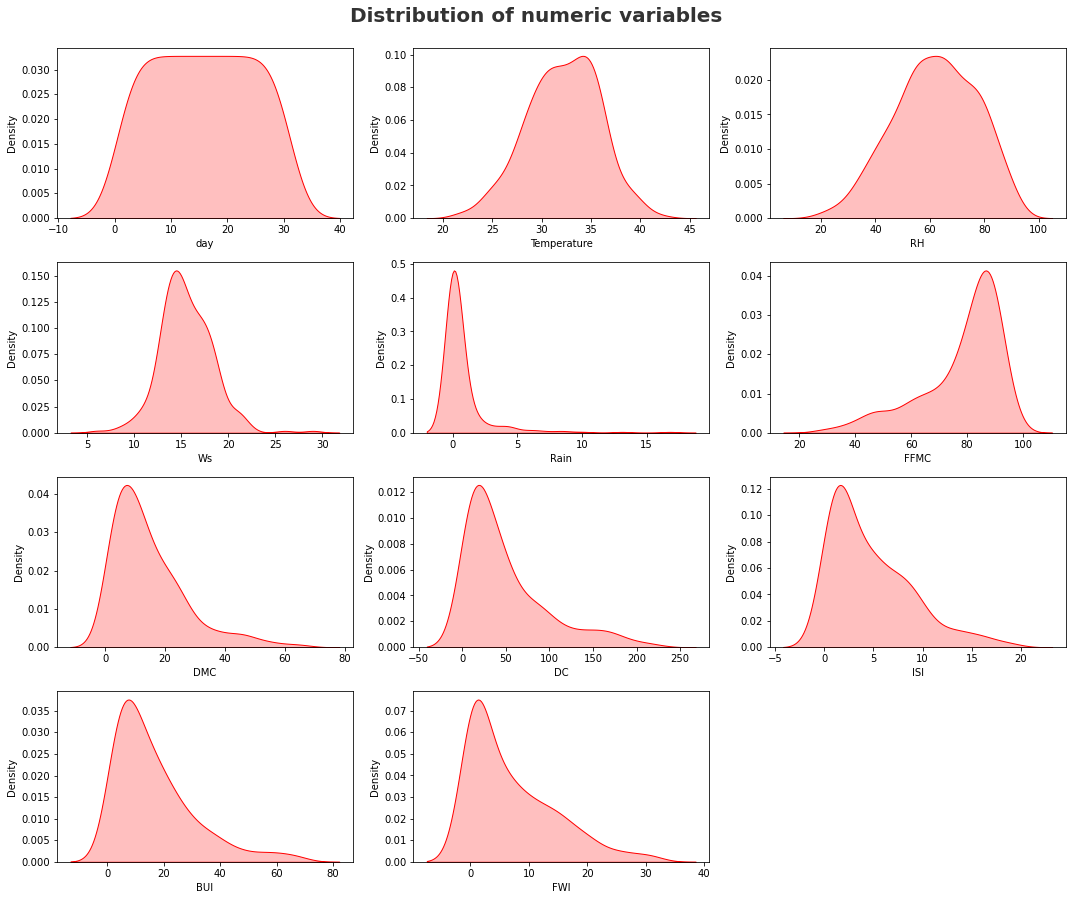

In [15]:
#Pictorial representation of data 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
plt.suptitle('Distribution of numeric variables', fontsize =20,    fontweight ='bold', alpha =0.8, y=1.)
sns.set_palette("pastel")
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Observation**
* These plots show how data for each variable has distributed across its mean value. 
* DMC, DC, ISI, BUI, FWI Rain are positively skewed distribution whereas FFMC, RH show negatively skewed data.
* Temperature, VS somewhat look normally distributed

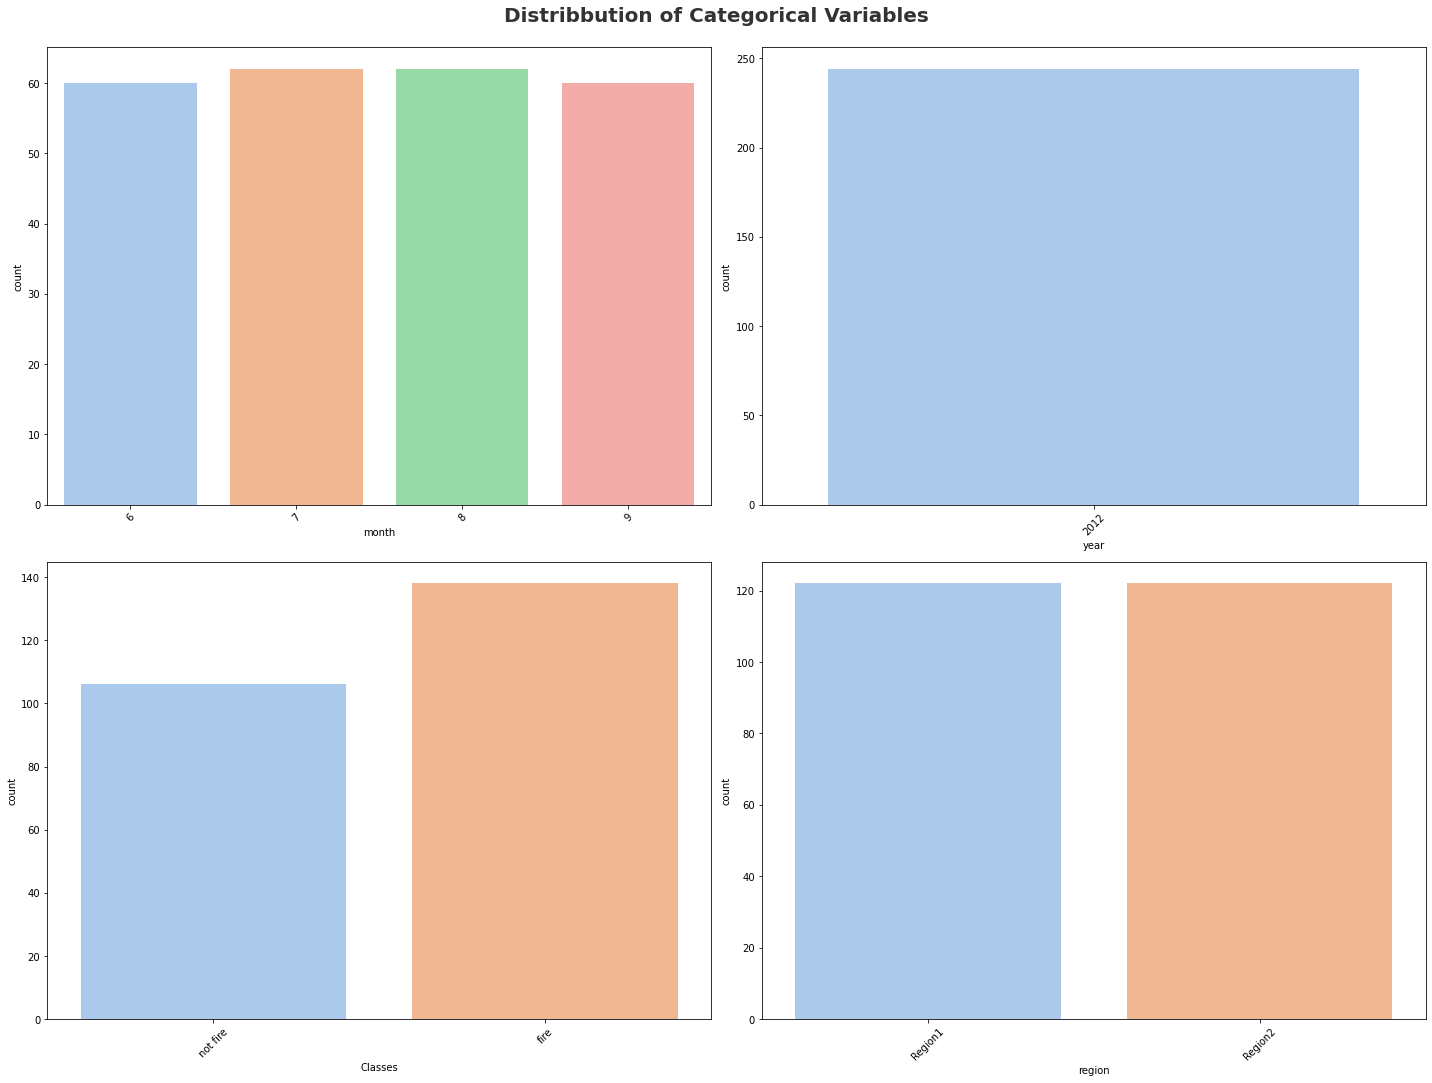

In [16]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Distribbution of Categorical Variables', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**Observation**

* Each month has more or less same representation in the data 
* Both the regions have exactly equally split
* Year has only one value so 100% data would fall under one value
* Classes which is the target variable shows some differences across 2 levels, fire occurrences are higher in number compared to no fire instances

<AxesSubplot:>

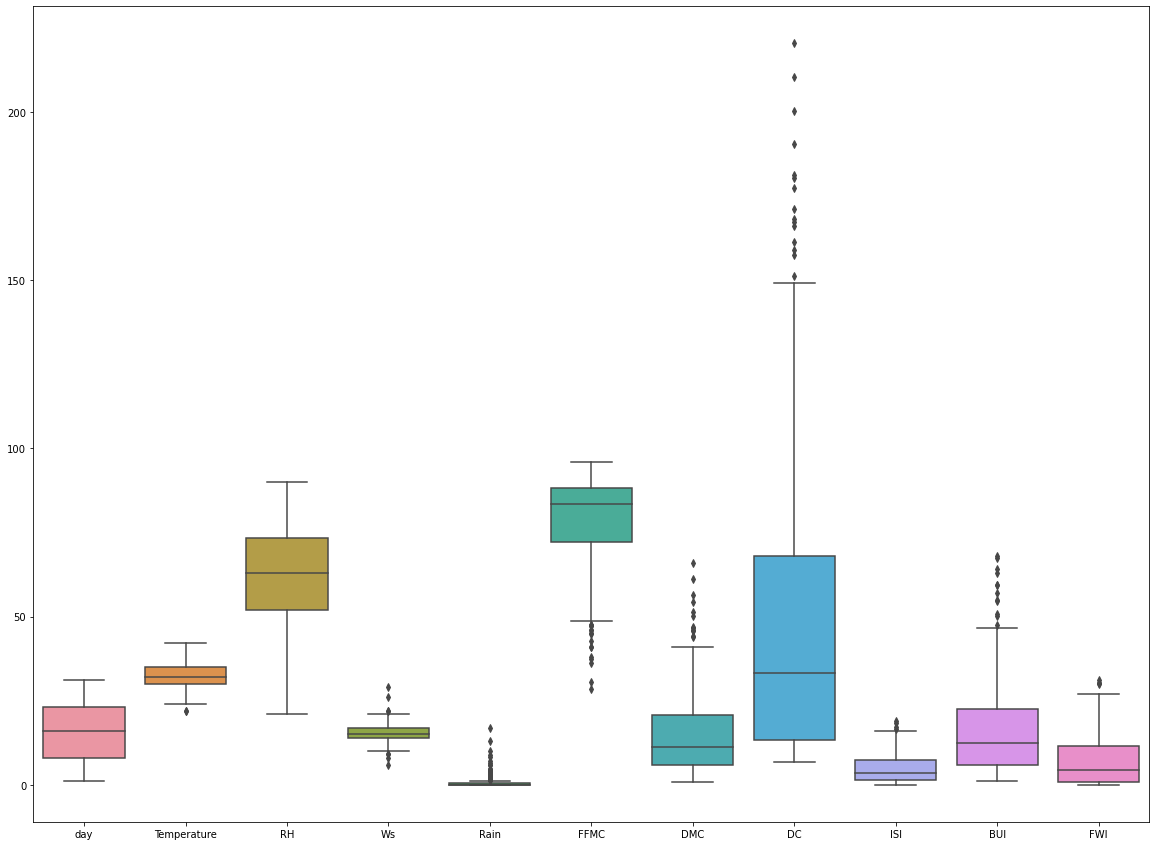

In [17]:
#outlier detection through box plots -
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)

**Observation**
* Wind speed (ws) has outliers on both the lower & upper ends
* Rain is showing outliers on the higher side only 
* Duff Moisture Code (DMC), Build-up index (BUI) has outliers on the upper ends and seems to have significant in number 
* Fine fuel Moisture Code (FFMC) has outliers only on the lower end 
* Though Temperature, Fire Weather Index (FWI), Initial spread index (ISI) show outliers but they are small in numbers
* Relative Humidity (RH) has not apparent outliers

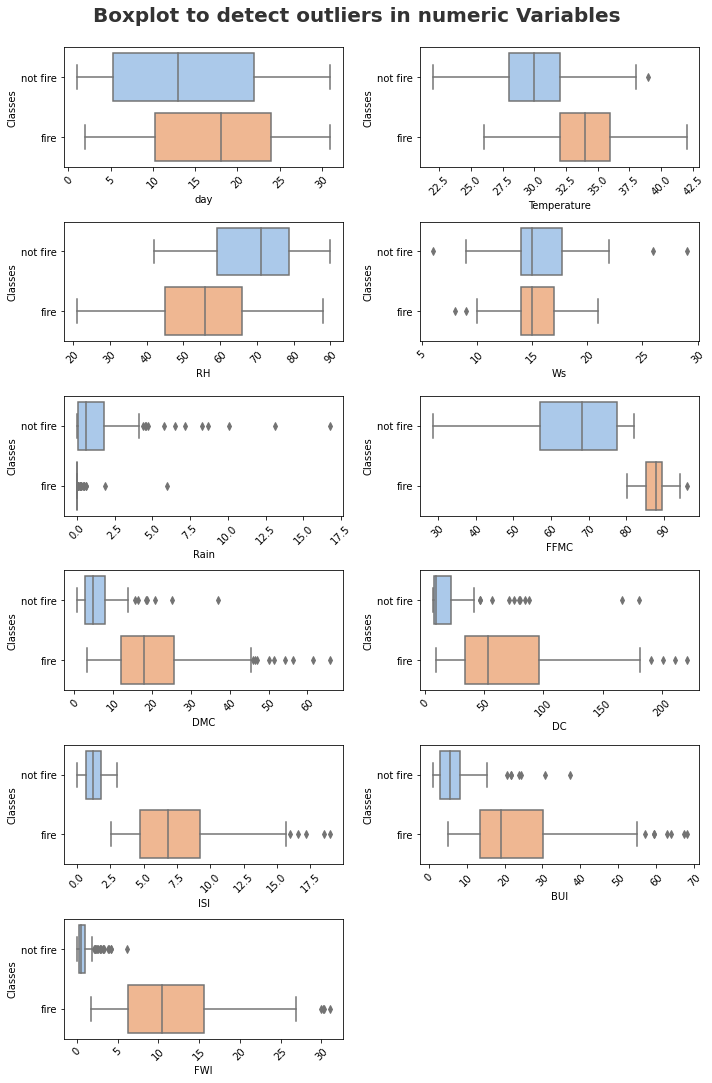

In [18]:
plt.figure(figsize=(10,15))
plt.suptitle('Boxplot to detect outliers in numeric Variables', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numeric_features)):
    plt.subplot(6, 2, i+1)
    sns.boxplot(x = df[numeric_features[i]],
            y = df['Classes'])
    plt.xlabel(numeric_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

**Observation**
* Through by group box plot here we are is trying to show how various variables (Xis) are distributed across 2 classes of the target (Y) variable. For example, Rain variable shows that in case of fire, we see very low rain has been reported with few outliers, whereas when cases when no fires are observed, we see that higher rain in the area has been reported with high number of outliers suggesting high millimetres or inches of rain
* Higher temperature range has been seen for target = fire suggesting that possible reasons for higher number of fire events could be high temperature


In [19]:
#check correlation 
df[(list(df.columns)[1:])].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


<AxesSubplot:>

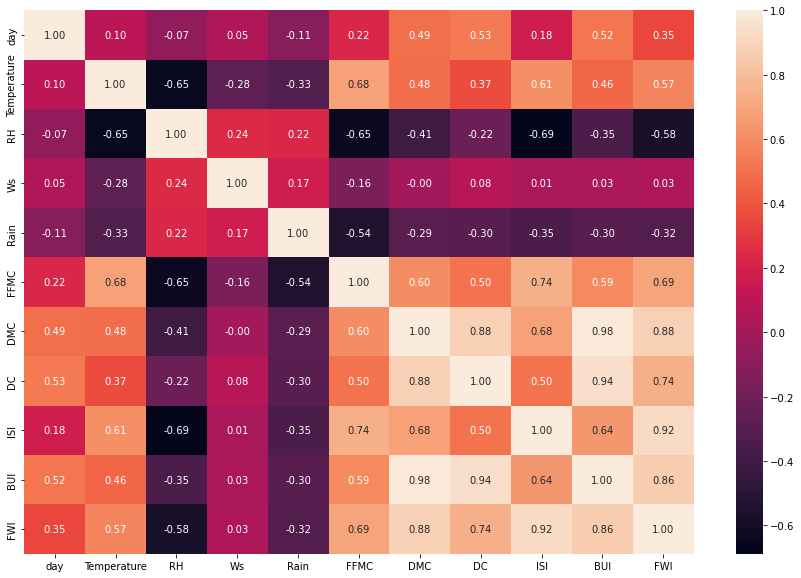

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

**Observation**
(Basis the threshold of abs(0.75)) - 
* Duff Moisture Code (DMC) & Build-up Index (BUI) pair shows high positive correlation
* Duff Moisture Code (DMC) & Drought Code (DC) pair shows high positive correlation
* Drought Code (DC) & Build-up Index (BUI) pair shows high positive correlation
* Build-up Index (BUI) & Fire Weather Index (FWI) pair shows high positive correlation
* Fire Weather Index (FWI) with Duff Moisture Code (DMC), Initial Spread Index (ISI) & Build-up Index (BUI) show high positive correlation
* We do not observe any strong correlation on the negative ends 

We cannot measure correlation between the target & numeric variables as their scales are different (Y is categorical & X is continuous).
In case of categorical though, we can use chi-sqr test of independence to test if 2 Xis are associated or if there is any association between target and categorical Xis. 

* A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that shows a relationship between two categorical variables.
* Here we test independence of Categorical columns with Target column i.e Classes




In [21]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Classes'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,month,Reject Null Hypothesis
1,year,Fail to Reject Null Hypothesis
2,Classes,Reject Null Hypothesis
3,region,Reject Null Hypothesis


**Observation**
* Chi-sqr test assumes the null hypothesis as there is no association between the target & the independent variable. Because the P value is lower than the alpha(los) i.e maximum risk of error, we can reject the null hypothesis almost in case of independent variables, except for year which is not a variable to be considered

In [22]:
#-check for missing counts variable wise
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

<Figure size 720x1080 with 0 Axes>

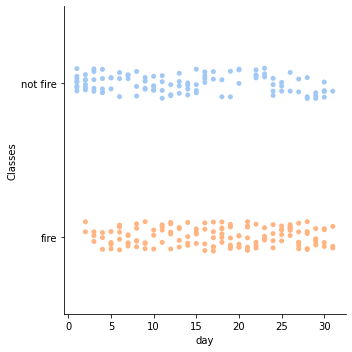

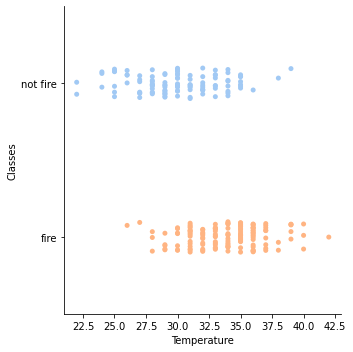

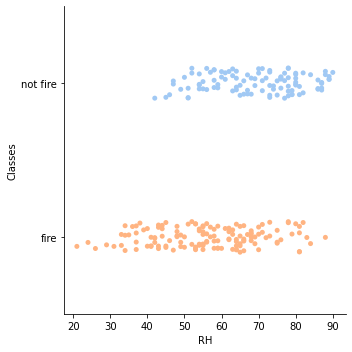

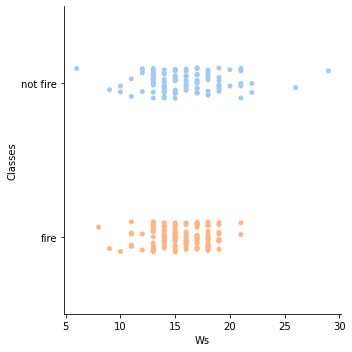

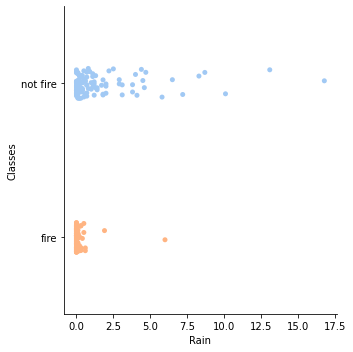

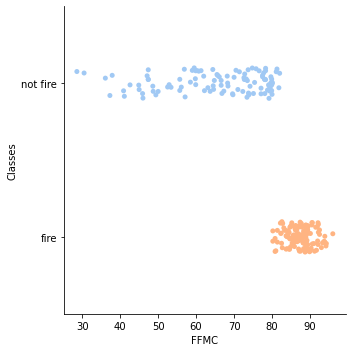

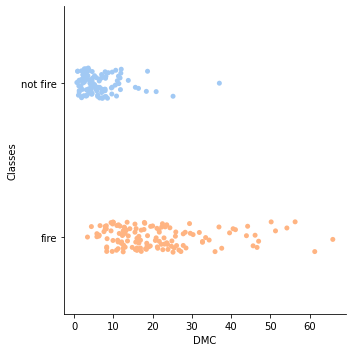

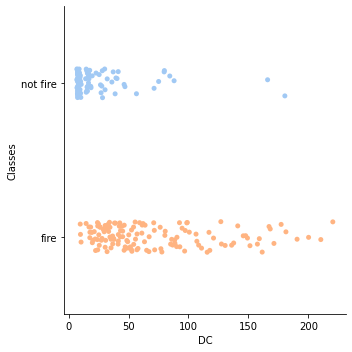

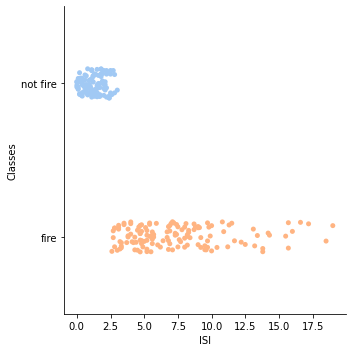

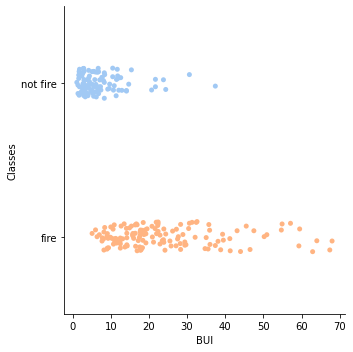

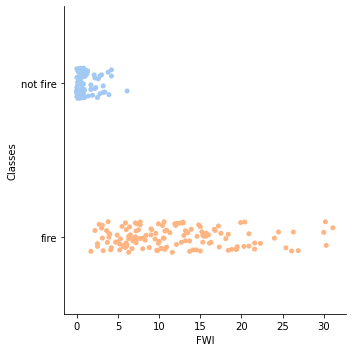

In [23]:
#---scatter plot to analyse the relation between the target & other X-variables 
plt.figure(figsize=(10,15))
plt.suptitle('Categorical Scatter Plot', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numeric_features)):
    sns.catplot(data=df,x =  f'{numeric_features[i]}',y = 'Classes')

In [24]:
#summary by target
for i in range(0, len(numeric_features)):
    print('---------------------------')
    print(df[[f'{numeric_features[i]}', 'Classes']].groupby('Classes').describe())
    print('---------------------------')

---------------------------
            day                                                   
          count       mean       std  min    25%   50%   75%   max
Classes                                                           
fire      138.0  17.311594  8.206994  2.0  10.25  18.0  24.0  31.0
not fire  106.0  13.726415  9.220612  1.0   5.25  13.0  22.0  31.0
---------------------------
---------------------------
         Temperature                                                   
               count       mean       std   min   25%   50%   75%   max
Classes                                                                
fire           138.0  33.818841  2.925437  26.0  32.0  34.0  36.0  42.0
not fire       106.0  30.028302  3.345096  22.0  28.0  30.0  32.0  39.0
---------------------------
---------------------------
             RH                                                      
          count       mean        std   min    25%   50%    75%   max
Classes                  

**Observation (based on catplots and target wise Xis summary)**
* In case of event of fire, we see Temperature values going up till ~42 whereas in case non-fire, not that high temperature values have been reported. However Just looking at the temperature value range for the two classes will not tell us if temperature information helps predict the 'fire event' probability.
* Higher Relative Humidity is observed in case of non-fire events vs lower humidity or rather dry weather reported during Fire events 
* Wind speed does not show a very stark difference fire or non-fire event 
* Non-fire instances observed to have higher amount of rainfall, whereas Fire instances seem to be happening cases where low rainfall has been measured. The trend however does not seem to be very strong
* In case of non-fire events, we clearly see lower range of Fine Fuel Moisture Code (FFMC) (29-82), whereas in cases of fire events, higher range of Fine Fuel Moisture Code (FFMC) has  been observed (80-96). A clear, distinct pattern can be seen emerging from the FFMC index
* In case of DMC, DC, ISI, BUI, FWI observed to have higher range in case fire events vs non-fire events. The difference seen though visually apparent, may not prove to be statistically significant unless tested otherwise

##### To get an initial estimate of importance of various feature - calculate IV & WOE
The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. This concept can be used to get some initial guesstimates about variable importance


In [25]:
#Binning of numeric data - creating equal size bins 
for i in range(0, len(numeric_features)):
    df[f'{"bin_"+ numeric_features[i]}'] = pd.qcut(df[numeric_features[i]], 5,duplicates='drop')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,...,bin_Temperature,bin_RH,bin_Ws,bin_Rain,bin_FFMC,bin_DMC,bin_DC,bin_ISI,bin_BUI,bin_FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,...,"(21.999, 29.0]","(49.0, 58.0]","(16.0, 18.0]","(-0.001, 0.1]","(28.599, 66.6]","(0.699, 4.4]","(6.899, 9.2]","(1.2, 2.42]","(1.0990000000000002, 5.1]","(-0.001, 0.5]"
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,...,"(21.999, 29.0]","(58.0, 66.0]","(5.999, 13.0]","(0.7, 16.8]","(28.599, 66.6]","(0.699, 4.4]","(6.899, 9.2]","(-0.001, 1.2]","(1.0990000000000002, 5.1]","(-0.001, 0.5]"
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,...,"(21.999, 29.0]","(76.0, 90.0]","(18.0, 29.0]","(0.7, 16.8]","(28.599, 66.6]","(0.699, 4.4]","(6.899, 9.2]","(-0.001, 1.2]","(1.0990000000000002, 5.1]","(-0.001, 0.5]"
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,...,"(21.999, 29.0]","(76.0, 90.0]","(5.999, 13.0]","(0.7, 16.8]","(28.599, 66.6]","(0.699, 4.4]","(6.899, 9.2]","(-0.001, 1.2]","(1.0990000000000002, 5.1]","(-0.001, 0.5]"
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,...,"(21.999, 29.0]","(76.0, 90.0]","(15.0, 16.0]","(-0.001, 0.1]","(28.599, 66.6]","(0.699, 4.4]","(9.2, 24.42]","(-0.001, 1.2]","(1.0990000000000002, 5.1]","(-0.001, 0.5]"


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   day              244 non-null    int64   
 1   month            244 non-null    object  
 2   year             244 non-null    object  
 3   Temperature      244 non-null    int64   
 4   RH               244 non-null    int64   
 5   Ws               244 non-null    int64   
 6   Rain             244 non-null    float64 
 7   FFMC             244 non-null    float64 
 8   DMC              244 non-null    float64 
 9   DC               244 non-null    float64 
 10  ISI              244 non-null    float64 
 11  BUI              244 non-null    float64 
 12  FWI              244 non-null    float64 
 13  Classes          244 non-null    object  
 14  region           244 non-null    object  
 15  bin_day          244 non-null    category
 16  bin_Temperature  244 non-null    category
 1

In [27]:
#Refresh categorical variable list
categorical_features = [feature for feature in df.columns if df[feature].dtype.name in ("object" ,"category")]
print(categorical_features)
#--derive binary target
df['target']=np.where(df['Classes'] =='fire',1,0)

['month', 'year', 'Classes', 'region', 'bin_day', 'bin_Temperature', 'bin_RH', 'bin_Ws', 'bin_Rain', 'bin_FFMC', 'bin_DMC', 'bin_DC', 'bin_ISI', 'bin_BUI', 'bin_FWI']


In [28]:
#woe & iv function (found online)
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [29]:
import warnings
warnings.filterwarnings('ignore')
IV = []

for col in categorical_features:
    if calculate_woe_iv(df, col, 'target') [1] <= 0.02:
        IV.append('Useless for prediction') 
    elif calculate_woe_iv(df, col, 'target') [1] > 0.02 and calculate_woe_iv(df, col, 'target') [1] <= 0.1:
        IV.append('Weak Predictor')
    elif calculate_woe_iv(df, col, 'target') [1] > 0.1 and calculate_woe_iv(df, col, 'target') [1] <= 0.3:
        IV.append('Medium Predictor')
    elif calculate_woe_iv(df, col, 'target') [1] > 0.3 and calculate_woe_iv(df, col, 'target') [1] <= 0.5:
        IV.append('Strong Predictor')
    else:
        IV.append('Too good to be true')

result = pd.DataFrame(data=[categorical_features, IV]).T
result.columns = ['Column', 'Predictive Power']
result           
            

,Column,Predictive Power
0,month,Too good to be true
1,year,Useless for prediction
2,Classes,Useless for prediction
3,region,Medium Predictor
4,bin_day,Medium Predictor
5,bin_Temperature,Too good to be true
6,bin_RH,Too good to be true
7,bin_Ws,Medium Predictor
8,bin_Rain,Too good to be true
9,bin_FFMC,Strong Predictor


**Observation**
* Region, Wind Speed, FFMC index, ISI can prove to be significant influencers compared to other variables in predicting the fire event probability. 
* Though as per IV cut offs, many variables are getting clubbed under 'Too good to be true' or 'Useless for prediction', this is to be used for directional purpose only and further deep dive analysis is needed to drop insignificant variables